<h2>A. Data Preparation</h2>

### Question : What is the most important variable to predict a car price? 

<h3>1. Preparation</h3>

<b>1.1 Import File</b>

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Link Cars DataSet
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Read dataset as dataframe without header
df = pd.read_csv(url, header = None)

# Shows the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
headers = ['symboling', 
          'normalized-losses', 
          'make', 
          'fuel-type', 
          'aspiration', 
          'num-of-doors', 
          'body-style', 
          'drive-wheels', 
          'engine-location', 
          'wheel-base', 
          'length', 
          'width', 
          'height',
          'curb-weight', 
          'engine-type', 
          'num-of-cylinders', 
          'engine-size', 
          'fuel-system', 
          'bore', 
          'stroke', 
          'compression-ratio', 
          'horsepower', 
          'peak-rpm', 
          'city-mpg', 
          'highway-mpg', 
          'price']

# Replace default header
df.columns = headers

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>1.2. Checking The Datasets</b>

In [4]:
# Check dataframe types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
# Returns a statistical summary
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
# Summary of all the columns
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [7]:
# Provides a concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<h3>2. Data Wrangling</h3>

<b>2.1. Identify Missing Values</b>

<p>Missing values can be displayed as "?", "N/A", "NaN"(Not a Number) or blank</p>

<b>2.1.1 Convert '?' to NaN</b>

In [8]:
import numpy as np

# Replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<b>2.1.2. Evaluating for Missing Data</b>

<p>Methods that can used to evaluate the missing data:</p>
<li><code>.isnull()</code></li>
<li><code>.notnull()</code></li>
The output is a boolean value.

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<b>2.1.3. Count Missing Values in Each Column</b>

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<p>there are 7 column that containing missing data :</p>
<ol>
    <li>'normalized-losses' : 41</li>
    <li>'num-of-doors' : 2</li>
    <li>'bore' : 4</li>
    <li>'stroke' : 4</li>
    <li>'horsepower' : 2</li>
    <li>'peak-rpm' : 2</li>
    <li>'price' : 4</li>
</ol>

<b>2.2. Deal with Missing Data</b>


<b>2.2.1. Replace by Mean</b>

<li>Replace NaN values in 'normalized-losses' column</li>

In [11]:
# Find and describe mean value
avg_norm_loss = (df['normalized-losses'].astype(float)).mean(axis=0)

# Replace NaN values
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<li>Replace NaN values in 'bore' column</li>

In [12]:
# Find and describe mean value
avg_bore = (df['bore'].astype(float)).mean(axis=0)

# Replace NaN values
df['bore'].replace(np.nan, avg_bore, inplace=True)

<li>Replace NaN values in 'stroke' column</li>

In [13]:
# Find and describe mean value
avg_stroke = (df['stroke'].astype(float)).mean(axis=0)

# Replace NaN values
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

<li>Replace NaN values in 'horsepower' column</li>

In [14]:
# Find and describe mean value
avg_horsepower = (df['horsepower'].astype(float)).mean(axis=0)

# Replace NaN values
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<li>Replace NaN values in 'peak-rpm' column</li>

In [15]:
# Find and describe mean value
avg_peakrpm = (df['peak-rpm'].astype(float)).mean(axis=0)

# Replace NaN values
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<b>2.2.2. Replace by Frequency</b>

<li>Replace NaN values in 'normalized-losses' column</li>

In [16]:
# Find the most common type value
freq_normalized = df['num-of-doors'].value_counts().idxmax()

# Replace NaN values
df['num-of-doors'].replace(np.nan, freq_normalized, inplace=True)

<b>2.2.3. Drop All Rows That Don't Have Price</b>

In [17]:
# Drop missing values
df.dropna(subset=['price'], axis=0, inplace=True)

# Reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>2.3. Correct Data Format</b>

<p>Methods that can used to finish the last step in data cleaning:</p>
<li><code>.dtype()</code> to check data type</li>
<li><code>.astype()</code> to convert data type</li>

In [21]:
# List the data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
# Convert object type of numerical to float/int type
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [23]:
# Show the result
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>2.4. Data Standardization</b>

<p>Transforming data into a common format which allows the researcher to make the meaningful comparison.</p>
<p>Convert fuel consumption mpg (miles per galon) with L/100km standard using this formula :</p>
L/100km = 235 / mpg

In [25]:
# Show dataframe
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


<li>'city-mpg' -> 'city-L/100km'</li>

In [26]:
# Convert mpg to L/100km
df['city-L/100km'] = 235/df['city-mpg']

# Check transformation
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<li>'highway-mpg' -> 'highway-L/100km'</li>

In [27]:
# Convert mpg to L/100km
df['highway-L/100km'] = 235/df['highway-mpg']

# Check transformation
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<b>2.6. Data Normalization</b>

<p>Scaling the variable or transforming values of several variables into a similar range. Here are the methods that we can use :</p>

<li><b>Simple Feature Scaling</b></li>
<code>xx = x / x.max()</code>
<li><b>Min-Max</b></li>
<code>xx = (x-x.min()) / (x.max()-x.min())</code>
<li><b>Z-score</b></li>
<code>xx = (x-x.mean()) / x.std()</code>

In [28]:
# Show dataframe before normalization
df[['length', 'width', 'height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [29]:
# Replace dataframe with new value by using Simple Feature Scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [30]:
# Show dataframe after normalization
df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<b>2.7. Binning</b>

<p>Grouping numerical variables to simplify analysis by using <code>.cut()</code> method in Pandas</p>

<p>Let's segment the 'horsepower' column from 57 unique values into 3 bins : 'Low','Medium' and 'High'</p>

In [35]:
# Convert data type to int
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'Horsepower Bins')

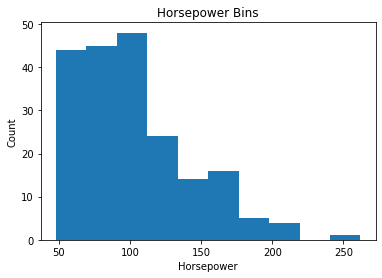

In [37]:
# Plot the histogram of 'horsepower' column before Binning
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Bins")

<p>Create 3 bins with numpy's function :</p>
<code>linspace(start_value, end_value, numbers_generated)</code>

<code>start_value</code> = min_value of 'horsepower'<br>
<code>end_value</code> = max_value of 'horsepower'<br>
<code>numbers_generated</code> = 4, which is containing :
<ol>
    <li>bottom line of min_val</li>
    <li>up line of min_val or bottom line of mid_val</li>
    <li>up line of mid_val or bottom line of max_val</li>
    <li>up line of max_val</li>
</ol>

In [38]:
# Create bins
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [39]:
# Set group names
group_names = ['Low', 'Medium', 'High']

In [40]:
# Apply 'cut' function to set the value
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [41]:
# See the number of vehicles in each bin
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower Bins')

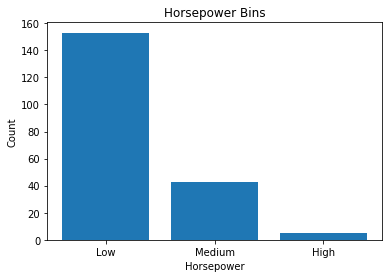

In [42]:
# Plot the distribution of each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Bins")

<b>2.8. Indicator Variable (Dummy Variable)</b>

<p>Labeling categories with a numerical variable</p>

<li>Create Indicator Variable of 'fuel-type' column and drop original column</li>

In [43]:
# Set dummy variable
dummy_variable_1 = pd.get_dummies(df['fuel-type'])

# Rename column
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
# Merge data 'df' and 'dummy_variable_1'
df = pd.concat([df,dummy_variable_1], axis=1)

# Drop original column
df.drop('fuel-type', axis=1, inplace=True)

In [45]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


<li>Create Indicator Variable of 'aspiration' column and drop original column</li>

In [46]:
# Set dummy variable
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# Rename column
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
# Merge data 'df' and 'dummy_variable_2'
df = pd.concat([df,dummy_variable_2], axis=1)

# Drop original column
df.drop('aspiration', axis=1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [49]:
df.to_csv('./Resource/clean_df.csv')

<h3>3. Exploratory Data Analysis (EDA)</h3>

<b>3.1. Analyzing Individual Feature Patterns using Visualization</b>

<p>To install seaborn we use the pip <code>pip install seaborn</code>which is the python package manager</p>

In [51]:
# Import matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [52]:
# Calculate the correlation between variables of type 'int64' or 'float64'
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<b>3.1.1. Continuous Numerical Variables</b>

<p>Variable with datatype as int64 or float64, the great way to visualize these variables is by using <b>scatterplots</b> with fitted lines</p>
<p>Using <code>.regplot()</code> funciton to plot hte fitted regression line for the data</p>

<li><b>Positive Linear Relationship</b></li>
Find the scatterplot of <code>'engine-size'</code> and <code>'price'</code> as the potential variable

(0.0, 53256.01760036843)

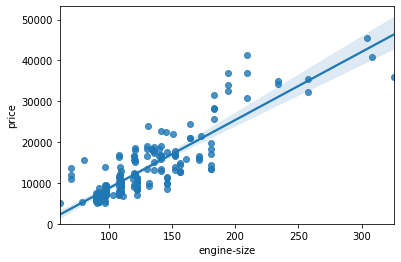

In [53]:
# 'engine-size' as a potential predictor variable of 'price'
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [54]:
# Examine the correlation
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


</p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

<hr>
Find the scatterplot of <code>'highway-mpg'</code> and <code>'price'</code> as the potential variable

(0.0, 48168.5479264144)

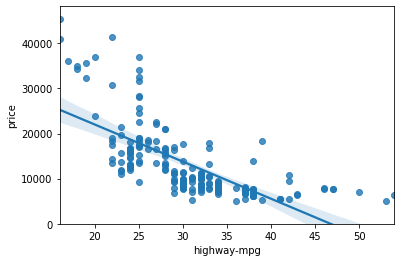

In [58]:
# 'highway-mpg' as a potential predictor variable of 'price'
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

In [59]:
# Examine the correlation
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

<li><b>Weak Linear Relationship</b></li>
Find the scatterplot of <code>'peak-rpm'</code> and <code>'price'</code>

(0.0, 47414.1)

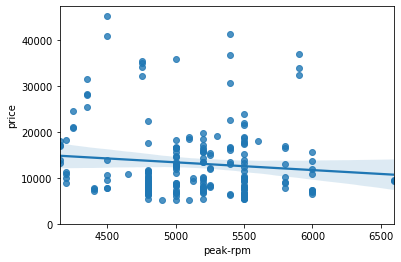

In [60]:
# Scatterplot of 'peak-rpm' and 'price'
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [61]:
# Examine the correlation
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

<hr>
Find the scatterplot of <code>'stroke'</code> and <code>'price'</code>

(0.0, 47414.1)

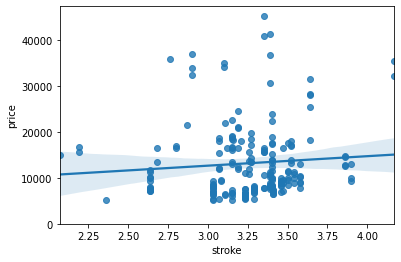

In [62]:
# Scatterplot of 'stroke' and 'price'
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

In [63]:
# Examine the correlation
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<b>3.1.2. Categorical Variables</b>

<p>Describe characteristic of variable with datatype as object or int64, the great way to visualize these variables is by using <code>.boxplot()</code>.

<AxesSubplot:xlabel='body-style', ylabel='price'>

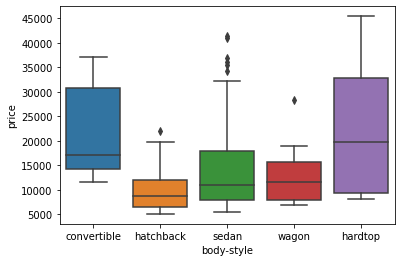

In [64]:
# Relationship between 'body-style' and 'price'
sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

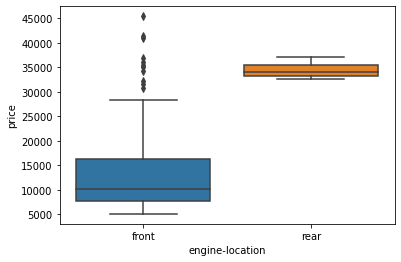

In [65]:
# Relationship between 'engine-location' and 'price'
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

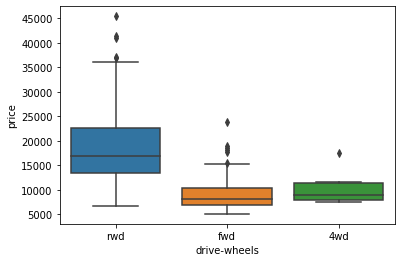

In [66]:
# Relationship between 'drive-wheels' and 'price'
sns.boxplot(x='drive-wheels', y='price', data=df)

<b>3.2. Descriptive Statistical Analysis</b>

<p>Using <code>.describe()</code> function to show resume of dataframe</p>
<ul>
    <li><b>count</b> column : the number of terms in the column (total record)</li>
    <li><b>mean</b> column : average column value</li>
    <li><b>std</b> column : column standard deviation</li>
    <li><b>min-max</b> column : min-max value</li>
    <li><b>25%-75%</b> column : the boundary of each of the quartiles</li>
    <li><b>unique</b> column : the number of distinct objects in the column</li>
    <li><b>top</b> column : the most frequently occuring object</li>
    <li><b>freq</b> column : the number of times the <b>top</b> object appears in the column</li>
</ul

In [67]:
# Describe dataframe which have int/float datatype
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [68]:
# Describe dataframe that have object datatype
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


<p>Using <code>.value_counts()</code> function to understanding how many units of each characteristic/variable we have.</p>

In [69]:
# Show characteristic and value of 'drive-wheels'
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [74]:
# Show as dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

# Rename 'drive-wheels' column
drive_wheels_counts.rename(columns={'drivew-wheels':'value_counts'}, inplace=True)

# Rename index column
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,drive-wheels
drive-wheels,
fwd,118
rwd,75
4wd,8


In [75]:
# Show characteristic and value of 'engine-location' as dataframe
engine_loc_counts = df['engine-location'].value_counts().to_frame()

# Rename 'drive-wheels' column
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)

# Rename index column
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<b>3.3. Basics of Grouping</b>

<p>Grouping data based on one or several variables so we can visualize the data easier.</p>

<b>3.3.1. Grouping Single Variable</b>

<li>Grouping 'drive-wheels' variables</li>

In [76]:
# See the different categories of 'drive-wheels'
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [78]:
# Create group to see the most valuable cateogry of 'drive-wheels'
df_group_one = df[['drive-wheels', 'price']]

# Grouping result (Avg of price per categories)
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<li>Grouping 'body-style' variables</li>

In [79]:
# See the different categories of 'body-style'
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [80]:
# Create group to see the most valuable cateogry of 'body-style'
df_group_two = df[['body-style', 'price']]

# Grouping result (Avg of price per categories)
df_group_two = df_group_two.groupby(['body-style'], as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<b>3.3.2. Grouping Multiple Variable</b>

<p>Let's group the unique combinations by both 'drive-wheels' and 'body-style'</p>

In [82]:
# Create group multiple variables
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<b>3.3.3. Visualize Grouping Variable with Pivot</b>

In [83]:
# Convert the dataframe to a pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [84]:
# Fill missing value with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<b>3.3.4. Visualize The Relation of Grouping Variable with Heat Map</b>

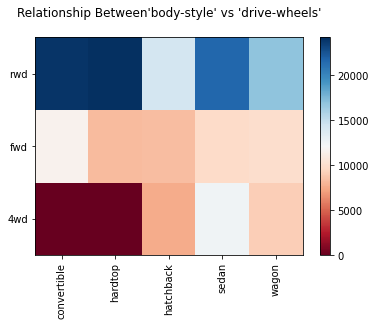

In [87]:
# Visualize the relationship with heat map
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

plt.title("Relationship Between'body-style' vs 'drive-wheels'\n")

fig.colorbar(im)
plt.show()

<b>3.4. Correlation and Causation</b>

<p>Analyze the relation between different variable(column) of dataframe</p>

<b>3.4.1. Pearson Correlation</b>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [89]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<b>3.4.2. P-value</b>
By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [91]:
# Import 'scipy' library to use 'stats' module
from scipy import stats

<li><b>'wheel-base' vs 'price'</b></li>

In [94]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<li><b>'horsepower' vs 'price'</b></li>

In [95]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<li><b>'length' vs 'price'</b></li>

In [96]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<li><b>'width' vs 'price'</b></li>

In [97]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


<li><b>'curb-weight' vs 'price'</b></li>

In [98]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


<li><b>'engine-size' vs 'price'</b></li>

In [99]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200232e-64


<li><b>'bore' vs 'price'</b></li>

In [100]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935261e-17


<li><b>'city-mpg' vs 'price'</b></li>

In [101]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<li><b>'highway-mpg' vs 'price'</b></li>

In [102]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


<b>3.5. ANOVA</b>

<p>Analyze the difference between different groups of the same variable(column)</p>

<p>Let's see if different types 'drive-wheels' impact 'price'</p>

In [104]:
# Group the data
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


<p>Obtain the values of method grop using <code>.get_group()</code> method</p>
<p>Obtain the <b>F-test score</b> and <b>P-value</b> using <code>.f_oneway()</code> function</p>

In [106]:
# Obtain value
val_fwd = grouped_test2.get_group('fwd')['price']
val_rwd = grouped_test2.get_group('rwd')['price']
val_4wd = grouped_test2.get_group('4wd')['price']

# ANOVA
f_val, p_val = stats.f_oneway(val_fwd, val_rwd, val_4wd)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


<p>Check the correlation of each group separetely</p>

<li><b>'fwd' vs 'rwd'</b></li>

In [107]:
# ANOVA
f_val, p_val = stats.f_oneway(val_fwd, val_rwd)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


<li><b>'4wd' vs 'rwd'</b></li>

In [108]:
# ANOVA
f_val, p_val = stats.f_oneway(val_4wd, val_rwd)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<li><b>'4wd' vs 'fwd'</b></li>

In [109]:
# ANOVA
f_val, p_val = stats.f_oneway(val_4wd, val_fwd)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Conclusion : Important Variables

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>


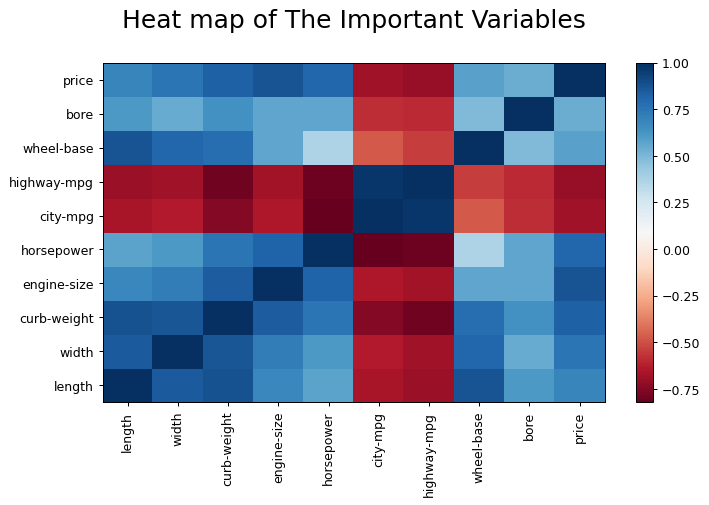

In [112]:
# Visualize correlation of the important variables
important_val = df[['length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore','price']].corr()
fig, ax = plt.subplots(figsize=(9,5), dpi=90)
im = ax.pcolor(important_val, cmap='RdBu')

# label names
row_labels = important_val.columns
col_labels = important_val.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(important_val.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(important_val.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

# Title
plt.title('Heat map of The Important Variables\n', fontsize=20)

fig.colorbar(im)
plt.show()

<hr>

<h2>B. Model Development</h2>

<h3>Question :
<li>Do I know if the dealer is offering fair value for my trade-in?</li>
<li>Do I know if I put a fair value on my car?</li></h3>

In [114]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


<h3>1. Linear Regression and Multiple Linear Regression</h3>

<b>1.1. Linear Regression</b>

<b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [115]:
# Import module
from sklearn.linear_model import LinearRegression

In [211]:
# Create linear regression object
lm = LinearRegression()
lm

LinearRegression()

<li><b>'highway-mpg' as predictor and 'price' as response</b></li>

In [212]:
# Set variable
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model
lm.fit(X,Y)

# Prediction output
Yhat = lm.predict(X)

# Show Yhat
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [213]:
# Check the intercept value (a)
lm.intercept_

38423.3058581574

In [214]:
# Check the slope value (b)
lm.coef_

array([-821.73337832])

<p>The final estimated linear model of car price by using 'high-way' as a predictor :</P>

In [215]:
# 'highway-mpg' of car predict
highway_car1 = 27

# Estimate the car price with linear model
price_car1 = lm.intercept_ + (lm.coef_*highway_car1)
print(price_car1)

[16236.50464347]


<li><b>'engine-size' as predictor and 'price' as response</b></li>

In [216]:
# Create linear regression object
lm1 = LinearRegression()

# Set variable
X = df[['engine-size']]
Y = df['price']

# Fit the linear model
lm1.fit(X,Y)

# Prediction output
Yhat = lm1.predict(X)

# Show Yhat
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [217]:
# Check the intercept value (a)
lm1.intercept_

-7963.338906281024

In [218]:
# Check the slope value (b)
lm1.coef_

array([166.86001569])

<p>The final estimated linear model of car price by using 'engine-size' as a predictor :</P>

In [219]:
# 'engine-size' of car predict
engine_car2 = 130

# Estimate the car price with linear model
price_car2 = lm1.intercept_ + (lm1.coef_*engine_car2)
print(price_car2)

[13728.4631336]


<b>1.2. Multiple Linear Regression</b>

<p>Similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.</p>
<br>
<b>Linear function:</b>
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<li><b>Develop model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as predictor varaibles</b></li>

In [220]:
# Set variable
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [221]:
# Check the intercept value (a)
lm.intercept_

-15811.863767729217

In [222]:
# Check the slope value (b)
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

<p>The final estimated linear model of car price by using horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as predictor variables :</P>

In [223]:
# Set attribute
car1_horse = 121
car1_curb = 2765
car1_engine = 164
car1_highway = 28

# Estimate the car price with multiple linear model
car1_price = lm.intercept_+ (lm.coef_[0]*car1_horse) + (lm.coef_[1]*car1_curb) + (lm.coef_[2]*car1_engine) + (lm.coef_[3]*car1_highway)

# Print price
print(car1_price)

18063.621279234085


<h3>2. Model Evaluation using Visualization</h3>

<b>2.1. Visualize Linear Regression Model</b>

<b>2.1.1. Regression Plot</b>

<p>This plot will give us a reasonable estimate of the relationship between the <b>two variables</b>, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

<li><b>Visualize the relationship between 'highway-mpg' and 'price'<b></li>

(0.0, 48168.051804901224)

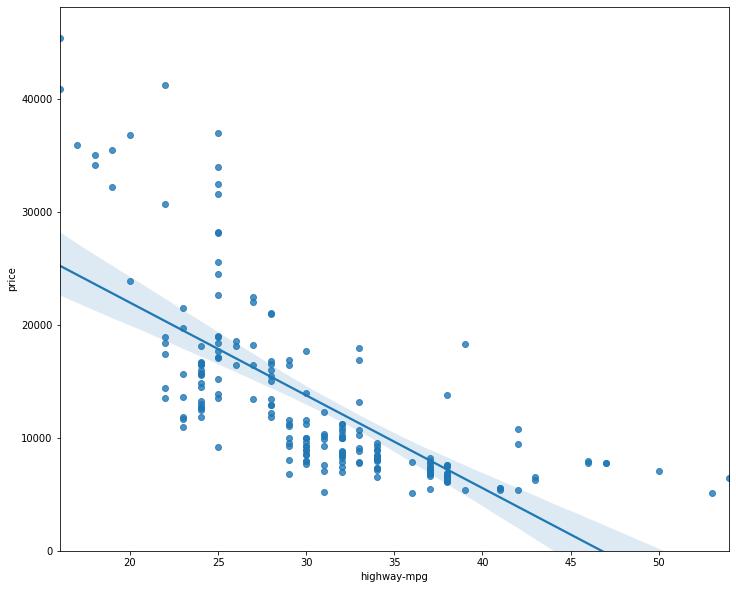

In [224]:
# Plot 'highway-mpg' as predictor
plt.figure(figsize=(12,10))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

<p>This plot show us that 'price' is negatively corralted to 'highway-mpg' (the regression slope is negative).</p>
<p>Spread of data points around the regression line give us indication of the variance of data, if the data is too far from the line, the linear model might not be the best for this data.</p>

<li><b>Visualize the relationship between 'peak-rpm' and 'price'<b></li>

(0.0, 47414.1)

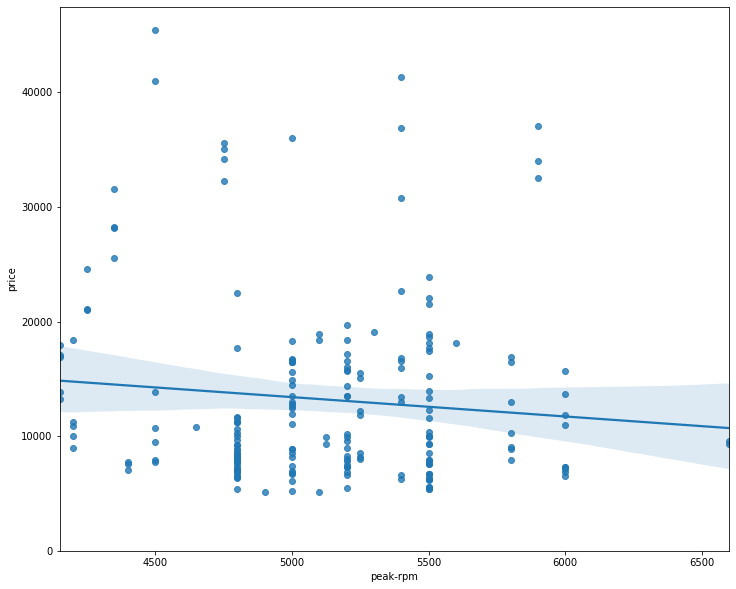

In [225]:
# Plot 'peak-rpm' as predictor
plt.figure(figsize=(12,10))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

<p>The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing</p>

</p>Let's verify that 'highway-mpg' is more strongly correlated with 'price' than 'peak-rpm' by using <code>.corr()</code> method.</p>

In [226]:
# Check the correlation
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<b>2.1.2. Residual Plot</b>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

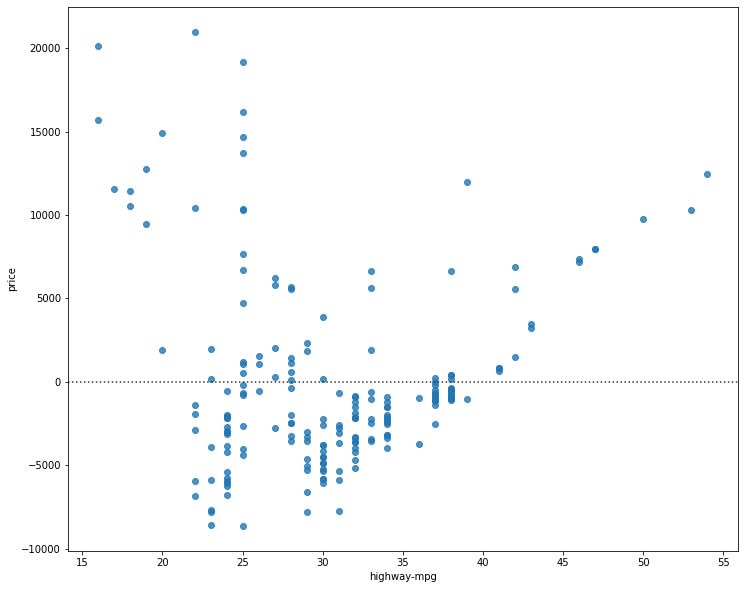

In [227]:
# Plot the 'highway-mpg'
plt.figure(figsize=(12,10))
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show()

If the data closely to 0, that means our model is good.

<b>2.2. Visualize Multiple Linear Regression Model</b>

<b>2.2.1. Distribution Plot</b>

<p>This plot will shows us the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [228]:
# Make a prediction
Y_hat = lm.predict(Z)

In [229]:
# Set dataframe
dist_data = pd.DataFrame()
dist_data['y-hat'] = Y_hat
dist_data['price'] = df['price']
dist_data.head()

,y-hat,price
0,13699.077005,13495.0
1,13699.077005,16500.0
2,19052.713467,16500.0
3,10620.615244,13950.0
4,15520.900253,17450.0


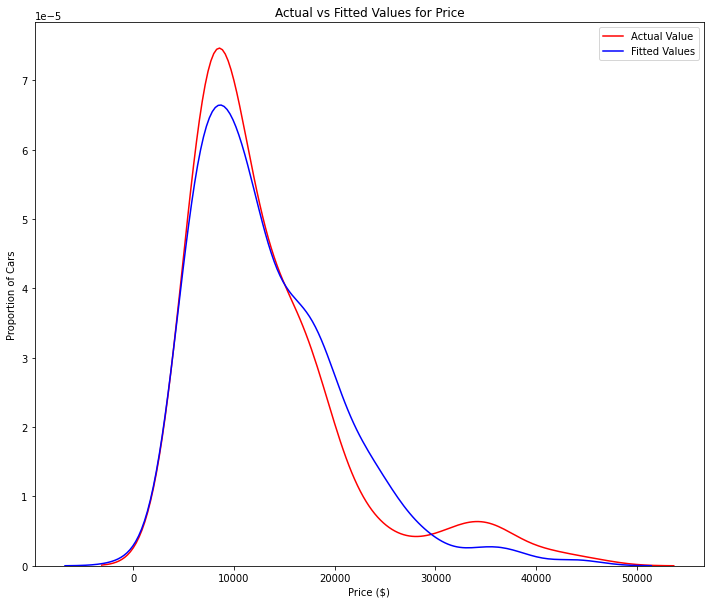

In [230]:
# Creat a plot
plt.figure(figsize=(12,10))

# Set distribution plot
fig = sns.kdeplot(data=dist_data, x='price', label='Actual Value', color='r')
fig = sns.kdeplot(data=dist_data, x='y-hat', label='Fitted Values', color='b')

# Set title
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price ($)')
plt.ylabel('Proportion of Cars')
plt.legend()

# Show plot
plt.show()
plt.close()

<h3>3. Polynomial Regression and Pipelines</h3>

<b>3.1. Polynomial Regression</b>

<p>Describe curvilinear relationship</p>

<p>Types :</p>
<ul>
    <li>Quadric - 2nd order</li>
    <li>Cubic - 3rd order</li>
    <li>Higher - > 3rd order</li>
</ul>

In [231]:
# Create PlotPolly function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [232]:
# Get the variables
x = df['highway-mpg']
y = df['price']

<b>Polynomial Cubic</b>

In [233]:
# Create polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


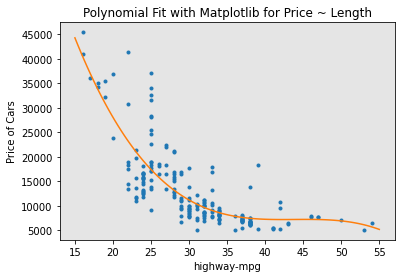

In [234]:
# Plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [235]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<b>Polynomial Higher order</b>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


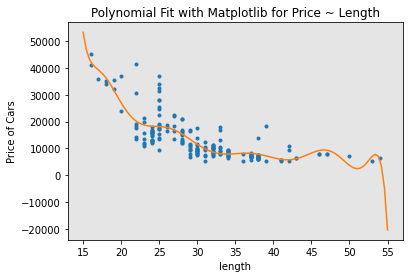

In [236]:
# Create polynomial of the 11th order (higher)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

# Plot the function
PlotPolly(p1, x, y, 'length')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

<p>We can perform a polynomial transform on multiple features. First, we import the module:</p>

In [237]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create object of degree 2
pr = PolynomialFeatures(degree=2)

# Fit transform
Z_pr = pr.fit_transform(Z)

In [238]:
# Check shape of original data
Z.shape

(201, 4)

In [239]:
# Check shape of data after transformation
Z_pr.shape

(201, 15)

<b>3.2. Pipeline</b>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [240]:
# Import Pipeline and StandardScaler from sklearn library
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [241]:
# Create a list of tuples
Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

In [242]:
# Input the list as an argument
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [243]:
# Normalize the data and Fit the model
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [244]:
# Normalize the data and produce a prediction
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

<h3>4. Measures for In-Sample Evaluation</h3>

<p>Evaluating model with a quantitive measure to determine how accurate the model is</p>
<p>There are two very important measure that often used :</p>
<ol>
    <li>R^2/R-squared</li>
    <li>Mean Squared Error (MSE)</li>
</ol>

<b>Model 1: Simple Linear Regression</b>

In [245]:
# Set variable
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model
lm.fit(X,Y)

LinearRegression()

<li><b>Calculate the R^2</b></li>

In [246]:
# Find the R^2
slr_r2 = lm.score(X,Y)
print('The R-square is: ',slm_r2)

The R-square is:  0.4965911884339176


<li><b>Calculate the MSE</b></li>

In [247]:
# Import MSE function from 'metrics' module
from sklearn.metrics import mean_squared_error

In [248]:
# Predict the output Yhat
Yhat = lm.predict(X)
print('The output of the first-five predicted value is: ', Yhat[0:5])

The output of the first-five predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [249]:
# Find the MSE
slr_mse = mean_squared_error(df['price'], Yhat)
print('The MSE of price and predicted value is: ', mse)

The MSE of price and predicted value is:  31635042.944639888


<b>Model 2: Multiple Linear Regression</b>

In [250]:
# Set variable
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']

# Fit the linear model
lm.fit(Z,Y)

LinearRegression()

<li><b>Calculate the R^2</b></li>

In [251]:
# Find the R^2
mlr_r2 = lm.score(Z,Y)
print('The R-square is: ', mlr_r2)

The R-square is:  0.8093732522175299


<li><b>Calculate the MSE</b></li>

In [252]:
# Predict the output Yhat
Y_predict_multifit = lm.predict(Z)
print('The output of the first-five predicted value is: ', Y_predict_multifit[0:5])

The output of the first-five predicted value is:  [13699.07700462 13699.07700462 19052.71346719 10620.61524404
 15520.90025344]


In [253]:
# Find the MSE
mlr_mse = mean_squared_error(df['price'], Y_predict_multifit)
print('The MSE of price and predicted value is: ', mlr_mse)

The MSE of price and predicted value is:  11979300.349818882


<b>Model 3: Polynomial Fit</b>

In [254]:
# Set the variables
x = df['highway-mpg']
y = df['price']

<li><b>Calculate the R^2</b></li>

In [255]:
# Import 'r2_score' function from 'metrics' module
from sklearn.metrics import r2_score

In [256]:
# Find the R^2
polynomial_r2 = r2_score(y, p(x))
print('The R-square value is: ', polynomial_r2)

The R-square value is:  0.674194666390652


<li><b>Calculate the MSE</b></li>

In [257]:
# Find the MSE
polynomial_mse = mean_squared_error(y, p(x))
print('The MSE value is: ', polynomial_mse)

The MSE value is:  20474146.426361218


<h3>5. Prediction and Decision Making</h3>

<b>5.1. Prediction</b>

<p>In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.</p>

In [258]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

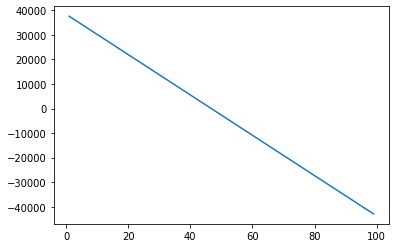

In [259]:
# Create numpy
new_input = np.arange(1,100,1).reshape(-1,1)

# Fit the model
lm.fit(X,Y)

# Produce a prediction
yhat = lm.predict(new_input)

# Plot the data
plt.plot(new_input, yhat)
plt.show()

<b>5.2. Decision Making: Determining a Good Model Fit</b>

<li>What is a good R-squared value? <b>The higher R-squred</b> value is a </li>better fit model
<li>What is a good MSE? <b>The smallest MSE</b> value is a better fit model</li>

In [260]:
# Import pandas
import pandas as pd

# Set dataframe
measure_data = [['R^2',slr_r2,mlr_r2,polynomial_r2],['MSE', slr_mse,mlr_mse,polynomial_mse]]
df_eval = pd.DataFrame(measure_data,columns=['Measure','Simple Linear','Multiple Linear','Polynomial'])
df_eval.head()

,Measure,Simple Linear,Multiple Linear,Polynomial
0,R^2,4.965912e-01,8.093733e-01,6.741947e-01
1,MSE,3.163504e+07,1.197930e+07,2.047415e+07


### Conclusion : Multiple Linear Regression is the best model

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>